<font color = 'green' size =6>7 Days Of Code Dia 2 e 3: Classificação de Popularidade</font>

Neste dia vou utilizar os dados tratados do dia 1 para realizar um modelo de classificação de Popularidade.

Este modelo se trata de um modelo supervisionado do tipo classificação. 

Tarefas Neste notebook:
1. Decidir critério para decidir popularidade (o menos enviesado possível)
2. Analisar equilíbrio dos dados
3. Criar modelo básico e Dummy
4. Avaliar diferentes métricas
5. Comparar com 2 modelos diferentes
6. Averificar Hiperparâmetros


# Importar Bibliotecas e Ler os Dados


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KaueAbbe/7DaysofCode_ML/main/dataset_normalizado.csv')
df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit
0,0.73,0.044043,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.55,0.028566,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.57,0.040255,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.71,0.038557,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.82,0.037969,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,0.0


# 1. Critério de Popularidade
## Como se distribui a popularidade?

(array([ 8026.,  7972., 16648., 10719., 13131., 10278.,  4576.,  1829.,
          396.,    34.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

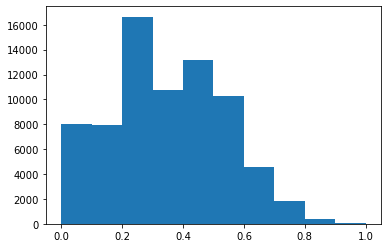

In [3]:
plt.hist(df.popularity)

Tenho muito mais valores de dados abaixo de 0.5 (metade de 1) do que acima de 0.5. Caso o critério seja maior que 0.8 para ser considerado popular terá muito pouco popular comparados com impopular. Vou utilizar primeiro como critérios acima de 0.6 pois já é difícil ter valores maior que 0.6. 

## Aplicando Critério

In [4]:
valores_popular = df.popularity.values
valores_popular 

array([0.73, 0.55, 0.57, ..., 0.22, 0.22, 0.22])

In [5]:

condlist = [valores_popular >= 0.6]
choicelist = [valores_popular]
clas_popular = np.select(condlist, [np.ones((1,len(choicelist[0])))], 0)
clas_popular[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [6]:
df['popularityClassifier'] = clas_popular[0]

In [7]:
df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit,popularityClassifier
0,0.73,0.044043,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0,1.0
1,0.55,0.028566,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0,0.0
2,0.57,0.040255,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0,0.0
3,0.71,0.038557,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0,1.0
4,0.82,0.037969,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,0.0,1.0


# 2. Balanceando Dados

In [8]:
df.popularityClassifier.value_counts()

0.0    65984
1.0     7625
Name: popularityClassifier, dtype: int64

In [9]:
from imblearn.over_sampling import RandomOverSampler
X = df.drop('popularityClassifier', axis = 1)
y = df['popularityClassifier']
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [10]:
X_resampled = X_resampled.drop('popularity', axis = 1)
X_resampled

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit
0,0.044043,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.028566,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.040255,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.038557,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.037969,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131963,0.040450,0.394924,0.4310,0.636364,0.767068,1.0,0.035648,0.250000,0.000000,0.1300,0.276382,0.584044,0.8,0.0
131964,0.050064,0.663959,0.8300,0.909091,0.827368,1.0,0.037927,0.000632,0.000001,0.1210,0.550754,0.513572,0.8,0.0
131965,0.051744,0.727919,0.2980,0.545455,0.745316,0.0,0.040829,0.557229,0.002930,0.0997,0.263317,0.476797,0.8,0.0
131966,0.032863,0.753299,0.5210,0.000000,0.789579,1.0,0.045699,0.025301,0.023000,0.5810,0.649246,0.513749,0.8,0.0


In [11]:
y_resampled.value_counts()

1.0    65984
0.0    65984
Name: popularityClassifier, dtype: int64

# 3. Modelo Básico e Dummy
**Aqui inicio a fase de teste e otimização**
## Dummy

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [13]:
X, x_validacao, Y, y_validacao = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True)
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [14]:
Dummy = DummyClassifier(strategy='prior')
Dummy.fit(x_treino, y_treino)

DummyClassifier()

In [15]:
Dummy.score(X_resampled, y_resampled)

0.5

## Modelo Simples com Cross_validate

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [17]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  std = results['test_score'].std()
  print('acuracia media: [%.2f]'%( media*100))
  print('acuracia intervalo: [%.2f, %.2f]'%( (media-2*std)*100, (media+2*std)*100))

In [18]:
SEED = 42
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)

modelo = DecisionTreeClassifier(max_depth = 5)
results = cross_validate(modelo, x_treino, y_treino, cv = cv)
imprime_resultados(results)

acuracia media: [62.52]
acuracia intervalo: [61.15, 63.90]


O modelo do DecisionTree é melhor que o Dummy. Que é um avanço!

# 4. Avaliando Métricas


In [19]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

In [20]:
def metricas(yprevisto):
    acuracy = round(accuracy_score(y_teste, yprevisto),2)*100
    precisao = round(precision_score(y_teste, yprevisto),2)*100
    
    print(f'Acurácia: {acuracy} \n Precisão: {precisao}')
    
    print(confusion_matrix(y_teste,yprevisto))

In [21]:
modelo.fit(x_treino, y_treino)
DT_previsao = modelo.predict(x_teste)
metricas(DT_previsao)

Acurácia: 62.0 
 Precisão: 57.99999999999999
[[4001 6575]
 [1412 9127]]


# 5. Criando outros modelos

In [22]:
from sklearn.naive_bayes import BernoulliNB

Bnb = BernoulliNB()
results = cross_validate(Bnb, x_treino, y_treino, cv = cv)
imprime_resultados(results)
Bnb.fit(x_treino, y_treino)
Bnbprevisao = Bnb.predict(x_teste)
metricas(Bnbprevisao)


acuracia media: [55.57]
acuracia intervalo: [54.62, 56.52]
Acurácia: 55.00000000000001 
 Precisão: 56.00000000000001
[[6766 3810]
 [5591 4948]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier

Knc = KNeighborsClassifier()
results = cross_validate(Knc, x_treino, y_treino, cv = cv)
imprime_resultados(results)

Knc.fit(x_treino, y_treino)
Kncprevisao = Knc.predict(x_teste)
metricas(Kncprevisao)

acuracia media: [79.82]
acuracia intervalo: [78.76, 80.88]
Acurácia: 81.0 
 Precisão: 74.0
[[ 7045  3531]
 [  403 10136]]


O modelo KneighborsClassifier está tendo resultados melhores que os outros modelos. Na matrix confusão ele apresenta menos erros. Enquanto a árvore de decisão erra dizendo que tem mais negativos que positivos, o Bernoulli diz que tem mais positivos. O Kneighbors apresenta menos erros nos falsos positivos e negativos que os outros dois modelos. 

Para seguir para os hiperparâmetros utilizarei o KneighborsClassifier

# 6. Otimização de Hiperparâmetros

In [122]:
for i in range(3, 10):
    Knc = KNeighborsClassifier(n_neighbors= i)
    results = cross_validate(Knc, x_treino, y_treino, cv = cv)
    print(f'{i} Vizinhos:')
    imprime_resultados(results)

3 Vizinhos:
acuracia media: [85.29]
acuracia intervalo: [84.61, 85.98]
4 Vizinhos:
acuracia media: [83.76]
acuracia intervalo: [82.99, 84.53]
5 Vizinhos:
acuracia media: [79.64]
acuracia intervalo: [78.95, 80.34]
6 Vizinhos:
acuracia media: [77.95]
acuracia intervalo: [77.45, 78.45]
7 Vizinhos:
acuracia media: [75.40]
acuracia intervalo: [74.31, 76.48]
8 Vizinhos:
acuracia media: [74.38]
acuracia intervalo: [73.57, 75.19]
9 Vizinhos:
acuracia media: [73.11]
acuracia intervalo: [72.06, 74.17]


In [123]:
for i in range(15, 21):
    Knc = KNeighborsClassifier(n_neighbors= i)
    results = cross_validate(Knc, x_treino, y_treino, cv = cv)
    print(f'{i} Vizinhos:')
    imprime_resultados(results)

15 Vizinhos:
acuracia media: [70.26]
acuracia intervalo: [69.46, 71.05]
16 Vizinhos:
acuracia media: [70.35]
acuracia intervalo: [69.34, 71.35]
17 Vizinhos:
acuracia media: [69.99]
acuracia intervalo: [68.92, 71.06]
18 Vizinhos:
acuracia media: [69.93]
acuracia intervalo: [68.71, 71.14]
19 Vizinhos:
acuracia media: [69.38]
acuracia intervalo: [68.42, 70.34]
20 Vizinhos:
acuracia media: [69.30]
acuracia intervalo: [68.46, 70.13]


In [125]:
for i in ['uniform','distance']:
    Knc = KNeighborsClassifier(weights= i)
    results = cross_validate(Knc, x_treino, y_treino, cv = cv)
    print(f'{i} weight:')
    imprime_resultados(results)

uniform weight:
acuracia media: [79.75]
acuracia intervalo: [79.00, 80.49]
distance weight:
acuracia media: [82.52]
acuracia intervalo: [81.42, 83.63]


In [126]:
for i in range(2, 7):
    for y in ['uniform','distance']:
        Knc = KNeighborsClassifier(n_neighbors= i, weights = y)
        results = cross_validate(Knc, x_treino, y_treino, cv = cv)
        print(f'{i} Vizinhos e {y} weights:')
        imprime_resultados(results)

2 Vizinhos e uniform weights:
acuracia media: [90.86]
acuracia intervalo: [90.42, 91.30]
2 Vizinhos e distance weights:
acuracia media: [91.87]
acuracia intervalo: [91.35, 92.39]
3 Vizinhos e uniform weights:
acuracia media: [85.27]
acuracia intervalo: [84.47, 86.06]
3 Vizinhos e distance weights:
acuracia media: [86.36]
acuracia intervalo: [85.63, 87.09]
4 Vizinhos e uniform weights:
acuracia media: [83.63]
acuracia intervalo: [82.57, 84.69]
4 Vizinhos e distance weights:
acuracia media: [86.53]
acuracia intervalo: [86.10, 86.97]
5 Vizinhos e uniform weights:
acuracia media: [79.74]
acuracia intervalo: [78.74, 80.74]
5 Vizinhos e distance weights:
acuracia media: [82.47]
acuracia intervalo: [81.86, 83.08]
6 Vizinhos e uniform weights:
acuracia media: [77.96]
acuracia intervalo: [76.63, 79.30]
6 Vizinhos e distance weights:
acuracia media: [83.12]
acuracia intervalo: [82.72, 83.52]


In [128]:
for i in range(2, 4):
    Knc = KNeighborsClassifier(n_neighbors= i, weights = 'distance', p=2)
    results = cross_validate(Knc, x_treino, y_treino, cv = cv)
    print(f'{i} Vizinhos e {y} weights:')
    imprime_resultados(results)

2 Vizinhos e distance weights:
acuracia media: [91.83]
acuracia intervalo: [91.29, 92.37]
3 Vizinhos e distance weights:
acuracia media: [86.40]
acuracia intervalo: [85.60, 87.19]


Mexendo em alguns hiperparâmetors vi que os melhores são: n_neighbors = 2, weights = 'distancia, p=2
# 7. Validação

In [24]:
Knc = KNeighborsClassifier(n_neighbors= 2, weights = 'distance', p=2)
results = cross_validate(Knc, x_treino, y_treino, cv = cv)
imprime_resultados(results)

Knc.fit(x_treino, y_treino)
Kncprevisao = Knc.predict(x_teste)
metricas(Kncprevisao)

acuracia media: [91.87]
acuracia intervalo: [91.43, 92.31]
Acurácia: 93.0 
 Precisão: 87.0
[[ 9057  1519]
 [   47 10492]]


In [25]:
Kncvalidacao = Knc.predict(x_validacao)

acuracy = round(accuracy_score(y_validacao, Kncvalidacao),2)*100
precisao = round(precision_score(y_validacao, Kncvalidacao),2)*100
    
print(f'Acurácia: {acuracy} \n Precisão: {precisao}')


Acurácia: 93.0 
 Precisão: 88.0


O modelo está validado!

Com Acurácia Média de 91.79%, e intervalo entre 91.22 e 92.36. Temos como resultados da validação acurácia de 92%, dentro do intervalo. 

Text(0.45, 91.5, 'Acurácia Média: 91.8% \nIntervalo da Acurácia: 91.22% e 92.36%.')

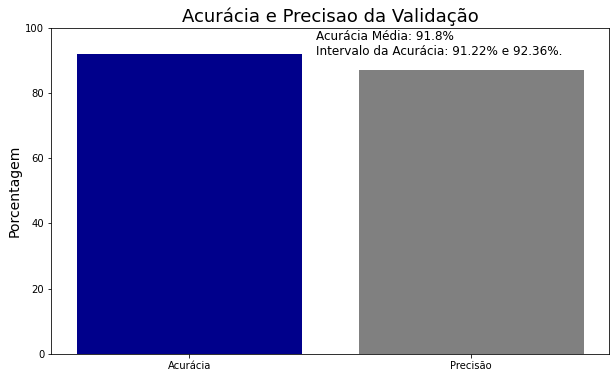

In [161]:
plt.figure(figsize = (10, 6))
plt.bar(x = ['Acurácia','Precisão'], height = [acuracy, precisao], color = ['darkblue','gray'])
plt.title('Acurácia e Precisao da Validação', fontsize = 18)
plt.ylabel('Porcentagem', fontsize = 14)
plt.ylim(0, 100)

plt.text(x = 0.45, y = 91.5, s = 'Acurácia Média: 91.8% \nIntervalo da Acurácia: 91.22% e 92.36%.', fontsize = 12,
         fontweight = 'roman')

<font color = 'green' size =6>7 Days Of Code Dia 4: Outras Formas de Progredir em Baseline</font>

O objetivo neste dia 4 adiante é realizar as tarefas dos dias de forma diferente que eu fiz a primeira vez.
Neste dia em específico vou realizar a criação da **baseline**, a qual na primeira vez foi realizada usando DummyClassifier. A baseline Dummy teve 50% de acurácia. 


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/KaueAbbe/7DaysofCode_ML/main/dataset_normalizado.csv')
valores_popular = df.popularity.values
condlist = [valores_popular >= 0.6]
choicelist = [valores_popular]
clas_popular = np.select(condlist, [np.ones((1,len(choicelist[0])))], 0)
df['popularityClassifier'] = clas_popular[0]

from imblearn.over_sampling import RandomOverSampler
X = df.drop(['popularityClassifier','duration_ms'], axis = 1)
y = df['popularityClassifier']
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled = X_resampled.drop('popularity', axis = 1)


from sklearn.model_selection import train_test_split
X, x_validacao, Y, y_validacao = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True)
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [33]:
LR = LogisticRegression()

In [34]:
LR.fit(x_treino, y_treino)

LogisticRegression()

In [35]:
y_previsto = LR.predict(x_teste)

In [36]:
SEED = 42
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)

modelo = LogisticRegression()
results = cross_validate(modelo, x_treino, y_treino, cv = cv)
imprime_resultados(results)

acuracia media: [60.95]
acuracia intervalo: [60.27, 61.63]


In [37]:
metricas(y_previsto)

Acurácia: 61.0 
 Precisão: 59.0
[[5543 5074]
 [3134 7364]]


In [38]:
LR.coef_

array([[ 0.58637173, -0.84705047,  0.0070411 , -0.52732455, -0.1124284 ,
        -1.45679308, -0.77129392, -1.49759267, -1.50336961, -0.2695139 ,
        -0.62652396,  0.35190018,  0.60511139]])

In [43]:
LR.intercept_

array([1.64711833])

In [29]:
from yellowbrick.model_selection import FeatureImportances

C:\Users\kauea\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\kauea\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


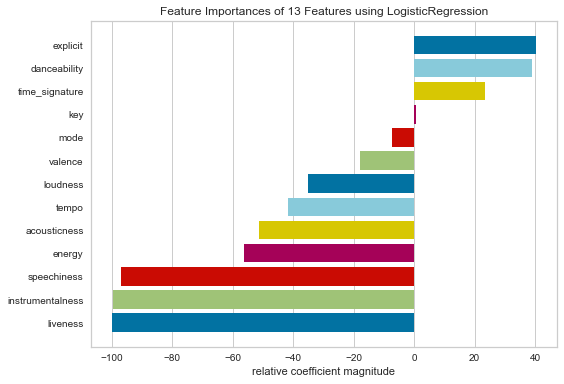

<AxesSubplot:title={'center':'Feature Importances of 13 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [41]:
viz = FeatureImportances(LR)
viz.fit(x_treino, y_treino)
viz.show()

### Anotações
Temos então que a mudança de BaseLine para LogisticRegression aumentou o valor da Baseline de **50% para 61.3%**. Neste cenário novo o modelo Bernoulli ficaria abaixo da Baseline, e a DecisionTree ficaria próximo dela. Neste cenário ambos os modelos seriam descartados mais rápido por não apresentar nem 10% de superioridade em relação a base.

**Aprendizado para o futuro:** O Dummy é um baseline muito simples, que se for fitado com dados balanceados terá sempre acurácia de 50%. Utilize outro modelo como Baseline para estudar melhor o problema e buscar resultados melhores durante sua pesquisa.

<font color = 'green' size =6>7 Days Of Code Dia 5: Outras Formas de Progredir em Métricas</font>

Neste dia tenho que realizar a escolha da **métrica**, a qual na primeira vez foi escolhida a acurácia. 

**Acurácia:** Avalia a quantidade de acertos no geral.

**Precisão:** Avalia quantos acertos com classificação positiva levando em consideração os falsos positivos. *Usado em modelos que precisa diminuir os falsos positivos*

**Recall:** Avalia quantos acertos com classificação positiva levando em consideração os falsos negativos. *Usado em modelos que precisa diminuir falsos negativos*

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score,ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        Knc,
        x_teste,
        y_teste,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Matrix')

In [38]:
def metricas_att(yprevisto):
    acuracy = round(accuracy_score(y_teste, yprevisto),2)*100
    precisao = round(precision_score(y_teste, yprevisto),2)*100
    recall =  round(recall_score(y_teste,yprevisto),2)*100
    
    print(f'Acurácia: {acuracy} \n Precisão: {precisao} \n Recall:{recall}')
    
    disp = ConfusionMatrixDisplay.from_estimator(
        Knc,
        x_teste,
        y_teste,
        cmap=plt.cm.Blues)
    disp.ax_.set_title('Matrix')

acuracia media: [55.53]
acuracia intervalo: [54.58, 56.48]
Acurácia: 56.00000000000001 
 Precisão: 56.99999999999999 
 Recall:47.0


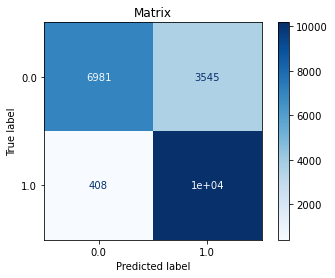

In [42]:
Bnb = BernoulliNB()
results = cross_validate(Bnb, x_treino, y_treino, cv = cv)
imprime_resultados(results)
Bnb.fit(x_treino, y_treino)
Bnbprevisao = Bnb.predict(x_teste)
metricas_att(Bnbprevisao)

acuracia media: [79.94]
acuracia intervalo: [79.30, 80.59]
Acurácia: 81.0 
 Precisão: 74.0 
 Recall:96.0


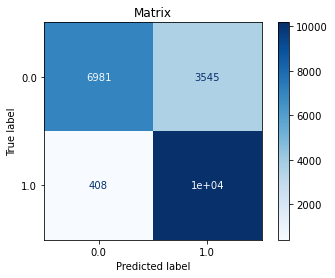

In [40]:
Knc = KNeighborsClassifier()
results = cross_validate(Knc, x_treino, y_treino, cv = cv)
imprime_resultados(results)

Knc.fit(x_treino, y_treino)
Kncprevisao = Knc.predict(x_teste)
metricas_att(Kncprevisao)

### Anotações
No fim optei pela mudança de métrica, de **acurácia para Recall**. O motivo se deve ao fato do Recall levar em consideração os *Falsos Negativos*, e para o contexto de avaliar popularidade de música seria mais interessante minimizar os erros de falso negativos. Dessa forma terá mais acertos quando dizer que a música não será popular.

**Aprendizado para o futuro:** Dependendo do problema a qual o modelo foi proposto serão utilizadas outras métricas. Cada métrica tem uma função específica, assim como equação, e por isso tem interpretação diferente. As quantidades de Verdadeiro Positivo, Verdadeiro Negativo, Falso Positivo e Falso Negativo são vistas na Matriz Confusão, e esses valores são utilizados no cálculo de precisão e Recall. 

<font color = 'green' size =6>7 Days Of Code Dia 6: Outras Formas de Progredir em Balanceamento e Hiperparâmetros</font>

## Balanceamento

In [54]:
from imblearn.under_sampling import RandomUnderSampler
Xu = df.drop('popularityClassifier', axis = 1)
yu = df['popularityClassifier']
rus = RandomUnderSampler(random_state=0)
Xu_resampled, yu_resampled = rus.fit_resample(Xu, yu)

Xu_resampled = Xu_resampled.drop('popularity', axis = 1)
X, x_validacao, Y, y_validacao = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True)
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [55]:
SEED = 42
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)

modelo = DecisionTreeClassifier(max_depth = 5)
results = cross_validate(modelo, x_treino, y_treino, cv = cv)
imprime_resultados(results)

acuracia media: [63.60]
acuracia intervalo: [62.58, 64.63]


In [30]:
results = cross_validate(Bnb, x_treino, y_treino, cv = cv)
imprime_resultados(results)
Bnb.fit(x_treino, y_treino)
Bnbprevisao = Bnb.predict(x_teste)
metricas(Bnbprevisao)

acuracia media: [55.82]
acuracia intervalo: [53.65, 57.99]
Acurácia: 55.00000000000001 
 Precisão: 56.99999999999999
[[775 442]
 [646 577]]


In [31]:
results = cross_validate(Knc, x_treino, y_treino, cv = cv)
imprime_resultados(results)

Knc.fit(x_treino, y_treino)
Kncprevisao = Knc.predict(x_teste)
metricas(Kncprevisao)

acuracia media: [59.59]
acuracia intervalo: [56.94, 62.24]
Acurácia: 61.0 
 Precisão: 60.0
[[690 527]
 [429 794]]


### Anotações
A realização do *UnderSampling* diminuiu os resultados das métricas, mostrando que o balanceamento feito por baixo (retirando dados do dataset) não contribuiu com uma melhor aprendizagem. Por este motivo utilizar o *OverSampling* é o método indicado.

**Aprendizado para o futuro:** Utilize sempre duas formas de balanceamento, pois a depender do problema pode ser que o método deo UnderSampling traga melhores resultados. Contudo, dê preferências pelo OverSampling já que ele garante mais dados para o fit.

## Hiperparâmetros

In [63]:
from imblearn.over_sampling import RandomOverSampler
X = df.drop('popularityClassifier', axis = 1)
y = df['popularityClassifier']
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled = X_resampled.drop('popularity', axis = 1)
X, x_validacao, Y, y_validacao = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True)
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.2, shuffle=True)

from sklearn.neighbors import KNeighborsClassifier

Knc = KNeighborsClassifier()
results = cross_validate(Knc, x_treino, y_treino, cv = cv)
imprime_resultados(results)

acuracia media: [79.87]
acuracia intervalo: [78.94, 80.80]


In [65]:
from sklearn.model_selection import GridSearchCV

SEED=42
np.random.seed(SEED)

espaco_de_parametros = {
    "n_neighbors" : [3, 10],
    "weights": ['uniform', 'distance'],
    "p": [1, 2]}

busca = GridSearchCV(Knc,
                    espaco_de_parametros,
                    cv = cv)

busca.fit(x_treino, y_treino)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.231523,0.036805,3.493722,0.971770,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.850343,0.855079,...,0.849870,0.846199,0.853067,0.854724,0.852948,0.857684,0.850562,0.852402,0.003082,4
1,0.286101,0.051702,4.142222,1.026447,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.860289,0.864906,...,0.861236,0.855553,0.863012,0.868932,0.862420,0.867630,0.859207,0.862738,0.003764,2
2,0.237938,0.026114,2.596392,0.446166,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.853422,0.856855,...,0.850343,0.850225,0.852119,0.852475,0.850699,0.857447,0.852694,0.853325,0.002660,3
3,0.235935,0.039246,1.974733,0.192140,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.862775,0.866682,...,0.861710,0.859578,0.861354,0.866682,0.860052,0.867630,0.861812,0.863673,0.003163,1
4,0.224505,0.032128,4.906885,0.395681,10,1,uniform,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.720341,0.730168,...,0.734075,0.727445,0.732063,0.734312,0.729695,0.727208,0.723150,0.728057,0.004675,7


In [66]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
86.36734763405506


### Anotações
O GridSerchCV faz o que eu fiz à mão, uma busca pelos parâmentros selecionado realizando todas as permutações de possibilidades das mesmas. E a realização do dataframe para observars os detalhes de cada resultado é um ótima ideia para entender como a variação dos hiperpâmetros influencia a acurácia.

**Aprendizado para o futuro:** Utilize o GridSerchCV para quando quiser fazer buscos permutadas entre 2 ou mais hiperparâmetros. Para apenas 1 hiperparâmetro vale a pena fazer da mesma forma que fiz anteriormente.  

# Pickle e Deploy

In [27]:
import pickle

In [33]:
file = open('Classifica_musica.pkl', 'wb')
pickle.dump(Knc ,file)